# Generation of additional data for noise classification.

In [0]:
import glob
import time

import random
import numpy as np
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
from IPython.display import Audio

plt.style.use("dark_background")

The duration(seconds) and sampling rate of audio files should be consistent with the [training data](https://www.kaggle.com/c/tensorflow-speech-recognition-challenge/data). 

In [0]:
# CONSTANTS 
# max amplitudes (power) of the generated signal
AMPLITUDES = [0.3, 0.5, 0.7, 1, 1.2,
              1.5, 2, 2.3, 2.7, 3]
# seconds
DURATION = 1
#https://manual.audacityteam.org/man/sample_rates.html
SAMPLE_RATE = 16000

In [0]:
# Noise generation

class Noise:
    def __init__(self, duration, sample_rate, ampls):
        """
        duration:  Duration in seconds of generated noise.
        sample_rate: Number of samples of audio carried per second.
        ampls: List of max amplitudes (power) of the generated signal.
        """
        self.duration = duration
        self.sample_rate = sample_rate
        self.n_samples = duration * sample_rate
        self.ampls = ampls


    def uncorrelated_uniform_noise(self,):
        """ https://en.wikipedia.org/wiki/White_noise"""
        ampl = random.choice(self.ampls)
        noise = np.random.uniform(-ampl, ampl, self.n_samples)
        return noise


    def uncorrelated_gaussian_noise(self):
        """https://en.wikipedia.org/wiki/Gaussian_noise"""
        ampl = random.choice(self.ampls)
        noise = np.random.normal(0, ampl, self.n_samples)
        return noise


    def brownian_noise(self):
        """https://en.wikipedia.org/wiki/Brownian_noise"""
        ampl = random.choice(self.ampls)
        dys = np.random.uniform(-1, 1, self.n_samples)
        noise = np.cumsum(dys)
        noise = self.normalize(self.unbias(noise), ampl)
        return noise


    def unbias(self, signal):
        """Shifts a wave array so it has mean 0."""
        return signal - signal.mean()


    def normalize(self, signal, ampl):
        """Normalizes a wave array so the maximum amplitude is +amp or -amp."""
        ampl = random.choice(self.ampls)
        high, low = abs(max(signal)), abs(min(signal))
        return ampl * signal / max(high, low)


    def get_duration(self):
        """Return duration of signal."""
        ts =  np.linspace(0, self.duration, self.n_samples)
        return ts


    def write(self, path_to_save, signal):
        """Writes a signal.
        """
        fn = str(int(time.time())) + ".wav"
        write(path_to_save + fn, self.sample_rate, signal)

In [0]:
# Plot noise signal
def plot_noise(signal, ts):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(ts, signal)
    ax.set_xlabel("Time(seconds) -->", fontsize=12)
    ax.set_ylabel("<-- Amplitude -->", fontsize=12)
    return plt.show()

In [0]:
make_noise = Noise(duration=DURATION, 
                   sample_rate=SAMPLE_RATE,
                   ampls=AMPLITUDES)

### [White Noise](https://en.wikipedia.org/wiki/White_noise)

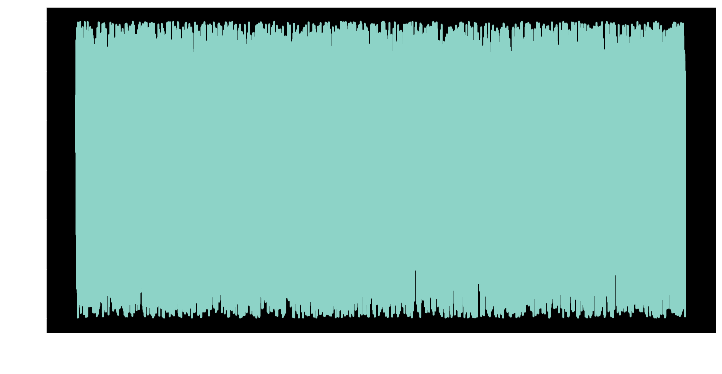

In [0]:
signal = make_noise.uncorrelated_uniform_noise()
ts = make_noise.get_duration()

plot_noise(signal, ts)
Audio(data=signal, rate=SAMPLE_RATE)

### [Gaussian Noise](https://en.wikipedia.org/wiki/Gaussian_noise)

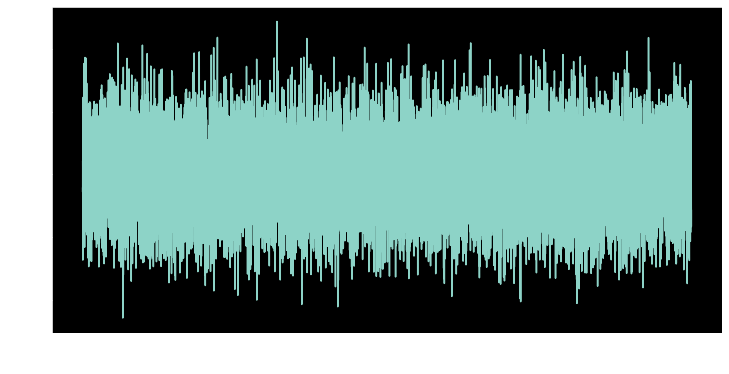

In [0]:
signal = make_noise.uncorrelated_gaussian_noise()
ts = make_noise.get_duration()

plot_noise(signal, ts)
Audio(data=signal, rate=SAMPLE_RATE)

### [Brownian Noise](https://en.wikipedia.org/wiki/Brownian_noise)

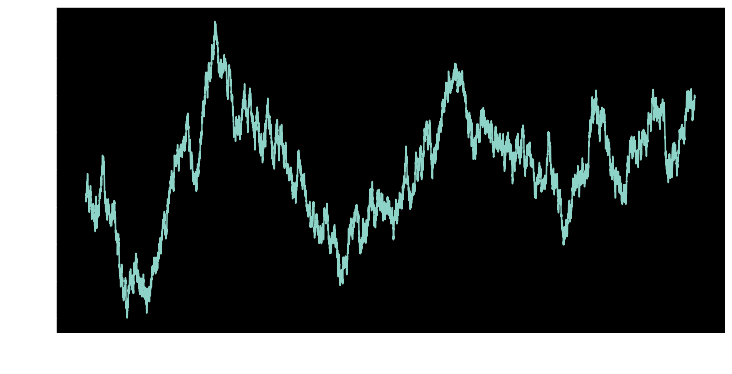

In [0]:
signal = make_noise.brownian_noise()
ts = make_noise.get_duration()

plot_noise(signal, ts)
Audio(data=signal, rate=SAMPLE_RATE)

### Write signal noise into **wav** format

In [0]:
path_to_save = "/content/"

signal = make_noise.brownian_noise()
make_noise.write(path_to_save, signal)

print(glob.glob("*.wav")[0])

1586882480.wav
